# GTEx and Tumor 100 Comparison

100 samples were run with GTEx and TCGA tumor as the background

- Analyze p-value distributions
- Analyze outlier intersections

# Inputs

In [26]:
import pandas as pd
import os

from tqdm.autonotebook import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [18]:
# Read in centered data
df = pd.read_hdf('/mnt/data/expression/tcga_gtex_tpm_norm_filt.hd5')
# Subset
gtex = df[df.label == 'gtex'].sort_values('tissue')
normal = df[df.label == 'tcga-normal'].sort_values('tissue')
tumor = df[df.label == 'tcga-tumor'].sort_values('tissue')
# Read in drug genes
genes = df.columns[5:]
drug_genes = [x.split('\t')[0] for x in open('../data/druggable-genes.tsv', 'r').readlines()]
drug_genes = [x for x in drug_genes if x in df.columns]

# Weights

Categorical scatterplot of tissues by matched-weight

## GTEx

In [426]:
# DataFrame: index=sample, cols=tissue, match-weight
rows = []
samples = []
for sample in tqdm(os.listdir(gtex_out)):
    samples.append(sample)
    sample_tissue = tumor.loc[sample].tissue
    weights = pd.read_csv(os.path.join(gtex_out, sample, 'weights.tsv'), sep='\t', index_col=0)
    weights.columns = ['Median', 'std']
    try:
        w = weights.loc[sample_tissue].Median
    except KeyError:
        w = 0
    rows.append([sample_tissue, w])
weights = pd.DataFrame(rows, index=samples, columns=['tissue', 'match-weight'])
weights = weights.sort_values('tissue')

In [392]:
weights.head()

,tissue,match-weight
TCGA-PR-A5PH-01,Adrenal,0.104814
TCGA-QT-A5XN-01,Adrenal,0.061936
TCGA-OU-A5PI-01,Adrenal,0.885370
TCGA-W2-A7HE-01,Adrenal,0.801650
TCGA-QR-A70C-01,Adrenal,0.021088


Text(0.5, 1.0, 'TCGA Tumor Samples and Model Weight for GTEx Matched Tissue')

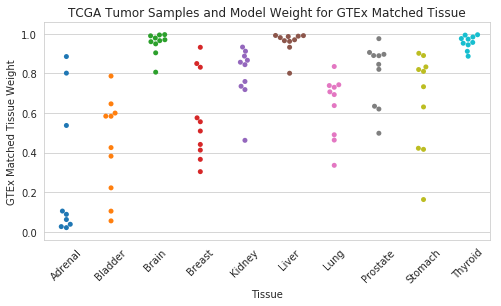

In [379]:
f, ax = plt.subplots(figsize=(8, 4))
sns.swarmplot(data=weights, x='tissue', y='match-weight')
plt.xticks(rotation=45)
plt.xlabel('Tissue')
plt.ylabel('GTEx Matched Tissue Weight')
plt.title('TCGA Tumor Samples and Model Weight for GTEx Matched Tissue')

### Adrenal

#### PCA

In [380]:
from sklearn.decomposition import pca
import umap

Create Dataframe for dimensionality reduction

In [433]:
tumor[tumor.tissue == 'Adrenal'].subtype.value_counts()

Pheochromocytoma_and_Paraganglioma    177
Adrenocortical_Carcinoma               77
Name: subtype, dtype: int64

In [432]:
tumor.loc[weights[weights.tissue == 'Adrenal'].index]

,id,tissue,subtype,tumor,label,RP11-40C6.2,IGHG1,IGKC,KRT5,IGLC2,...,IGHEP1,RP11-44N21.4,GAPDHP61,P2RX5-TAX1BP3,RP11-408H20.3,RP13-726E6.2,CTB-43E15.1,ZNF878,OR2H2,RP4-530I15.9
TCGA-PR-A5PH-01,TCGA-PR-A5PH-01,Adrenal,Pheochromocytoma_and_Paraganglioma,yes,tcga-tumor,7.831143,5.028159,6.226872,0.014355,4.535428,...,0.0,0.000000,0.042644,0.275004,0.0,0.042644,0.000000,0.111034,0.028568,0.042644
TCGA-QT-A5XN-01,TCGA-QT-A5XN-01,Adrenal,Pheochromocytoma_and_Paraganglioma,yes,tcga-tumor,8.647798,6.033374,6.895656,0.070387,5.370174,...,0.0,0.000000,0.070387,0.201631,0.0,0.000000,0.000000,0.485434,0.263040,0.713697
TCGA-OU-A5PI-01,TCGA-OU-A5PI-01,Adrenal,Adrenocortical_Carcinoma,yes,tcga-tumor,8.197518,2.757007,3.609952,0.000000,1.304513,...,0.0,0.000000,0.000000,0.604087,0.0,0.000000,0.000000,0.536053,0.000000,0.028568
TCGA-W2-A7HE-01,TCGA-W2-A7HE-01,Adrenal,Pheochromocytoma_and_Paraganglioma,yes,tcga-tumor,8.599919,11.453914,11.790207,0.056585,11.275581,...,0.0,0.163501,0.042644,0.286878,0.0,0.150556,0.097613,0.056585,0.000000,0.070387
TCGA-QR-A70C-01,TCGA-QR-A70C-01,Adrenal,Pheochromocytoma_and_Paraganglioma,yes,tcga-tumor,6.903886,4.102631,5.706566,0.084067,3.962543,...,0.0,0.000000,0.070387,0.150556,0.0,0.000000,0.000000,0.189038,0.070387,0.056585
TCGA-QR-A7IN-01,TCGA-QR-A7IN-01,Adrenal,Pheochromocytoma_and_Paraganglioma,yes,tcga-tumor,7.741152,3.030359,4.723512,0.056585,2.510988,...,0.0,0.000000,0.000000,0.226513,0.0,0.084067,0.000000,0.176318,0.000000,0.070387
TCGA-QR-A6ZZ-01,TCGA-QR-A6ZZ-01,Adrenal,Pheochromocytoma_and_Paraganglioma,yes,tcga-tumor,8.585956,3.953279,5.340906,0.669016,3.670203,...,0.0,0.000000,0.000000,0.298665,0.0,0.000000,0.000000,0.042644,0.042644,0.014355
TCGA-QR-A70K-01,TCGA-QR-A70K-01,Adrenal,Pheochromocytoma_and_Paraganglioma,yes,tcga-tumor,7.750110,4.394413,6.755700,0.000000,4.796516,...,0.0,0.000000,0.000000,0.150556,0.0,0.042644,0.000000,0.310339,0.176318,0.042644
TCGA-PK-A5HA-01,TCGA-PK-A5HA-01,Adrenal,Adrenocortical_Carcinoma,yes,tcga-tumor,9.861251,3.073808,4.070348,0.070387,1.948586,...,0.0,0.000000,0.000000,0.056585,0.0,0.028568,0.000000,0.150556,0.000000,0.137501


In [235]:
adrenal = weights[weights.tissue == 'Adrenal']
low_samples = adrenal[adrenal['match-weight'] < 0.5].index
high_samples = adrenal[adrenal['match-weight'] >= 0.5].index
low_samples = ['TCGA-QT-A5XN-01', 'TCGA-QR-A70C-01', 'TCGA-QR-A7IN-01',
               'TCGA-QR-A6ZZ-01', 'TCGA-PR-A5PH-01', 'TCGA-QR-A70K-01']
low_samples = tumor.loc[low_samples]
low_samples['tissue'] = 'Low-Match-Tumors'
high_samples = tumor.loc[high_samples]
high_samples['tissue'] = 'High-Match-Tumors'

tissues = ['Brain', 'Stomach', 'Kidney', 'Colon', 'Adrenal']
#tissues = ['Adrenal']
pca_df = pd.concat(
    [gtex[gtex.tissue.isin(tissues)], low_samples, high_samples]
)

In [236]:
embedding = pd.DataFrame(
    #umap.UMAP().fit_transform(umap_df[genes]),
    pca.PCA(n_components=2).fit_transform(pca_df[genes]),
    columns=['PCA1', 'PCA2']
)
embedding['tissue'] = list(pca_df.tissue)

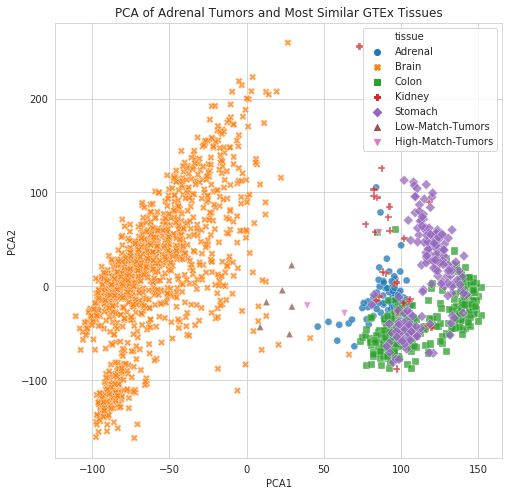

In [237]:
f, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(
    data=embedding, x='PCA1', y='PCA2', hue='tissue', style='tissue', alpha=0.75, linewidth=0.4, s=50
)
#plt.arrow(45, -100, 0, 35, head_width=5, head_length=5, color='k')
#plt.text(45, -110, 'Mixtures', fontsize=13, horizontalalignment='center')
plt.title('PCA of Adrenal Tumors and Most Similar GTEx Tissues')
plt.savefig('/mnt/figures/Matched-Adrenal-PCA.svg');

#### UMAP

In [238]:
adrenal = weights[weights.tissue == 'Adrenal']
low_samples = adrenal[adrenal['match-weight'] < 0.5].index
high_samples = adrenal[adrenal['match-weight'] >= 0.5].index
low_samples = tumor.loc[low_samples]
low_samples['tissue'] = 'Low-Match-Tumors'
high_samples = tumor.loc[high_samples]
high_samples['tissue'] = 'High-Match-Tumors'

#tissues = ['Brain', 'Stomach', 'Kidney', 'Colon', 'Adrenal']
tissues = ['Adrenal']
pca_df = pd.concat(
    [gtex[gtex.tissue.isin(tissues)], low_samples, high_samples]
)

In [239]:
embedding = pd.DataFrame(
    umap.UMAP().fit_transform(pca_df[genes]),
    columns=['PCA1', 'PCA2']
)
embedding['tissue'] = list(pca_df.tissue)

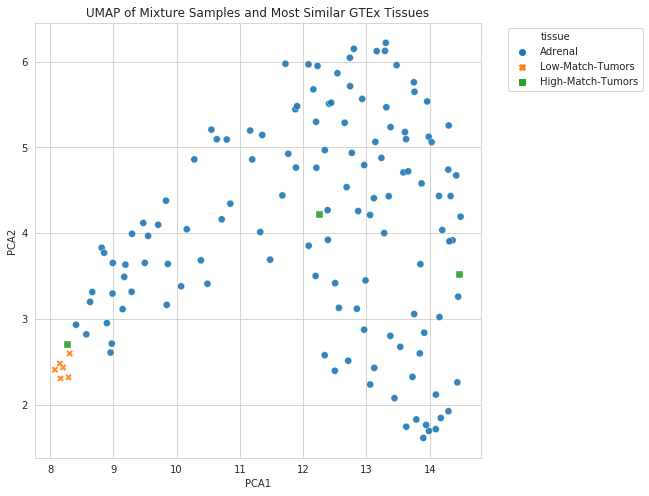

In [240]:
f, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(
    data=embedding, x='PCA1', y='PCA2', hue='tissue', style='tissue', alpha=0.9, linewidth=0.4, s=50
)
#plt.arrow(45, -100, 0, 35, head_width=5, head_length=5, color='k')
#plt.text(45, -110, 'Mixtures', fontsize=13, horizontalalignment='center')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title('UMAP of Adrenal Samples and Most Similar GTEx Tissues')
plt.savefig('/mnt/figures/Matched-Adrenal-UMAP.svg');

### Bladder
#### PCA

In [393]:
bladder = list(weights[weights.tissue == 'Bladder'].index)
samples = tumor.loc[bladder]
samples['tissue'] = 'Bladder-Tumors'

tissues = ['Bladder', 'Minor', 'Vagina']
pca_df = pd.concat(
    [gtex[gtex.tissue.isin(tissues)], samples]
)

In [394]:
embedding = pd.DataFrame(
    umap.UMAP().fit_transform(pca_df[genes]),
    columns=['PCA1', 'PCA2']
)
embedding['tissue'] = list(pca_df.tissue)

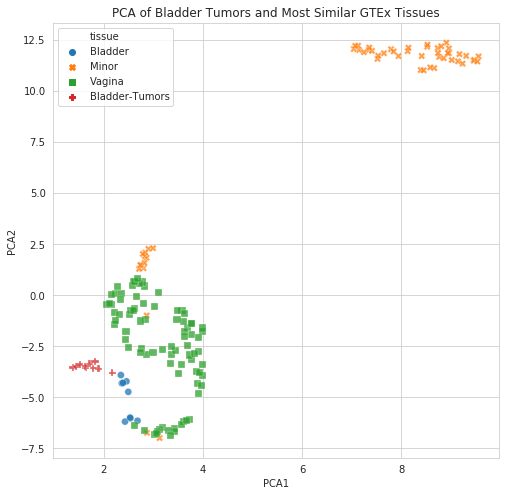

In [395]:
f, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(
    data=embedding, x='PCA1', y='PCA2', hue='tissue', style='tissue', alpha=0.75, linewidth=0.4, s=50
)
plt.title('PCA of Bladder Tumors and Most Similar GTEx Tissues')
plt.savefig('/mnt/figures/Matched-Bladder-PCA.svg');

#### UMAP

In [399]:
embedding = pd.DataFrame(
    umap.UMAP().fit_transform(pca_df[genes]),
    columns=['UMAP1', 'UMAP2']
)
embedding['tissue'] = list(pca_df.tissue)

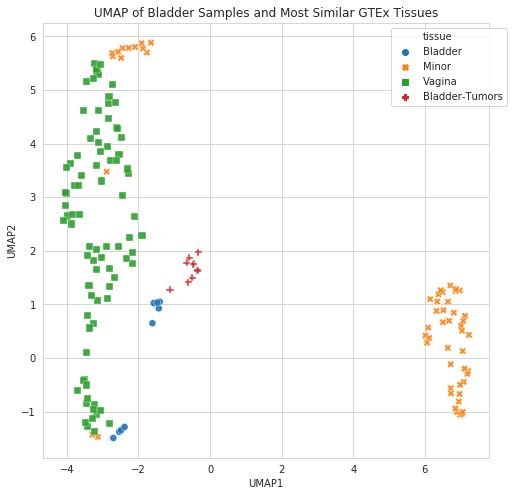

In [400]:
f, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(
    data=embedding, x='UMAP1', y='UMAP2', hue='tissue', style='tissue', alpha=0.9, linewidth=0.4, s=50
)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title('UMAP of Bladder Samples and Most Similar GTEx Tissues')
plt.savefig('/mnt/figures/Matched-Bladder-UMAP.svg');

### Tissue by Tissue Weight HeatMap

Collect weights for all tissues

In [389]:
# DataFrame: index=sample, cols=tissue, normal-tissue, weight
weights = []
tissues = tumor.tissue
for sample in tqdm(os.listdir(gtex_out)):
    samples.append(sample)
    #sample_tissue = tumor.loc[sample].tissue
    sample_tissue = tissues.loc[sample]
    w = pd.read_csv(os.path.join(gtex_out, sample, 'weights.tsv'), sep='\t', index_col=0)
    w = w.reset_index()
    w.columns = ['normal_tissue', 'Median', 'std']
    w['tissue'] = sample_tissue
    w['sample'] = sample
    weights.append(w.drop('std', axis=1))
weights = pd.concat(weights)

Convert into percetanges by matches tissue

In [390]:
c = weights.groupby(['tissue', 'normal_tissue'])['Median'].sum().rename("count")
perc = c / c.groupby(level=0).sum() * 100
perc = perc.reset_index()
perc.head()

,tissue,normal_tissue,count
0,Adrenal,Adrenal,29.074413
1,Adrenal,Bladder,2.244816
2,Adrenal,Brain,23.955536
3,Adrenal,Colon,6.427922
4,Adrenal,Heart,0.824437


Convert to 2D table

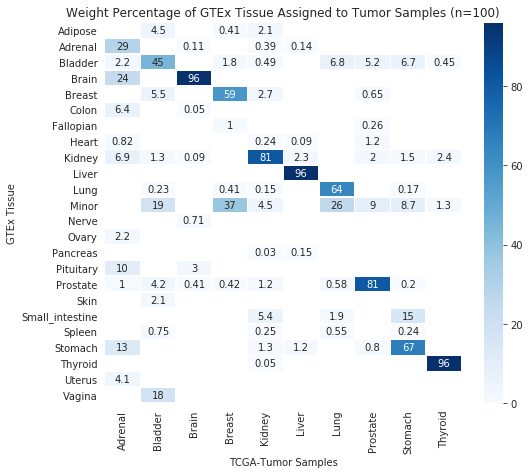

In [383]:
plt.figure(figsize=(8, 7))
perc_heat = perc.pivot(index='normal_tissue', columns='tissue', values='count')
sns.heatmap(
    perc_heat.apply(lambda x: round(x, 2)), 
    cmap='Blues', 
    annot=True,
    linewidths=.5,
)
plt.xlabel('TCGA-Tumor Samples')
plt.ylabel('GTEx Tissue')
plt.title('Weight Percentage of GTEx Tissue Assigned to Tumor Samples (n=100)')
plt.savefig('/mnt/figures/GTEx-weight-heatmap.svg')

In [388]:
weights.head()

,normal_tissue,Median,tissue,sample
0,Lung,0.747403,Lung,TCGA-55-1595-01
1,Breast,0.135222,Lung,TCGA-55-1595-01
2,Pancreas,0.067361,Lung,TCGA-55-1595-01
3,Thymus,0.017655,Lung,TCGA-55-1595-01
4,Skin,0.011794,Lung,TCGA-55-1595-01


## Matched-Normal

In [438]:
normal_out = '/mnt/outlier-runs/gtex-tumor-100/normal'

In [439]:
# DataFrame: index=sample, cols=tissue, normal-tissue, weight
weights = []
tissues = tumor.tissue
for sample in tqdm(os.listdir(normal_out)):
    samples.append(sample)
    #sample_tissue = tumor.loc[sample].tissue
    sample_tissue = tissues.loc[sample]
    w = pd.read_csv(os.path.join(normal_out, sample, 'weights.tsv'), sep='\t', index_col=0)
    w = w.reset_index()
    w.columns = ['normal_tissue', 'Median', 'std']
    w['tissue'] = sample_tissue
    w['sample'] = sample
    weights.append(w.drop('std', axis=1))
weights = pd.concat(weights)

In [440]:
c = weights.groupby(['tissue', 'normal_tissue'])['Median'].sum().rename("count")
perc = c / c.groupby(level=0).sum() * 100
perc = perc.reset_index()
perc.head()

,tissue,normal_tissue,count
0,Adrenal,Adrenal,21.539559
1,Adrenal,Brain,7.817012
2,Adrenal,Cervix,7.047997
3,Adrenal,Pancreas,2.143182
4,Adrenal,Prostate,4.667885


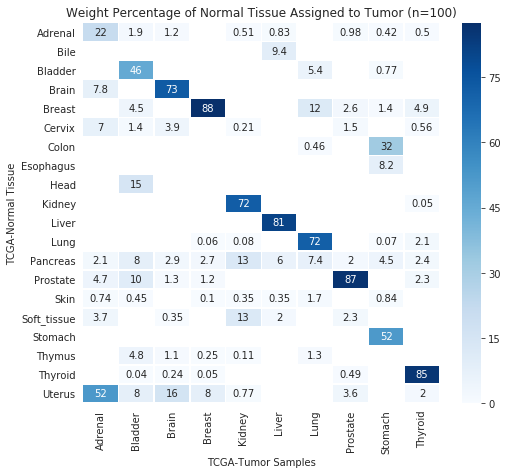

In [441]:
plt.figure(figsize=(8, 7))
perc_heat = perc.pivot(index='normal_tissue', columns='tissue', values='count')
sns.heatmap(
    perc_heat.apply(lambda x: round(x, 2)), 
    cmap='Blues', 
    annot=True,
    linewidths=.5,
)
plt.xlabel('TCGA-Tumor Samples')
plt.ylabel('TCGA-Normal Tissue')
plt.title('Weight Percentage of Normal Tissue Assigned to Tumor (n=100)')
plt.savefig('/mnt/figures/Normal-weight-heatmap.svg')

## Tumor

See **Manuscript-Figures/Weight-GTEx-Normal**

# Outlier Counts by Tissue

Collect pvals

In [453]:
gtex_out = '/mnt/outlier-runs/gtex-tumor-100/gtex'
normal_out = '/mnt/outlier-runs/gtex-tumor-100/normal'
tumor_out = '/mnt/outlier-runs/gtex-tumor-100/tumor'
paths = [gtex_out, normal_out, tumor_out]
labels = ['gtex', 'normal', 'tumor']

In [456]:
pvals = []
for sample in tqdm(os.listdir(gtex_out)):
    for label, path in zip(labels, paths):
        try:
            p = pd.read_csv(os.path.join(path, sample, 'pvals.tsv'), sep='\t', index_col=0)
            p['dataset'] = label
            p['sample'] = sample
            p['tissue'] = tumor.loc[sample].tissue
            pvals.append(p.reset_index())
        except:
            pass
pvals = pd.concat(pvals)

In [458]:
pvals.head(2)

,Gene,Pval,dataset,sample,tissue
0,CCND1,0.00709,gtex,TCGA-55-1595-01,Lung
1,PIK3C3,0.02176,gtex,TCGA-55-1595-01,Lung


## GTEx

Select outliers by p-value cutoff

In [477]:
outliers = pvals[(pvals.Pval < 0.05) & (pvals.dataset == 'gtex')]

In [478]:
g = outliers.groupby(['Gene', 'tissue'])
count = g.count().reset_index()
count.head(2)

,Gene,tissue,Pval,dataset,sample
0,AC006126.4,Brain,1,1,1
1,AGR2,Brain,1,1,1


In [480]:
array = count.pivot_table(values='Pval', index='Gene', columns='tissue')
array = array.loc[sorted(drug_genes)]
array.head(3)

tissue,Adrenal,Bladder,Brain,Breast,Kidney,Liver,Lung,Prostate,Stomach,Thyroid
Gene,,,,,,,,,,
AKT1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AKT3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0


In [484]:
top_outliers = array[array.sum(axis=1) > 1]

Text(0.5, 1.0, 'Top Overexpressed Outlier Target Genes by Tissue')

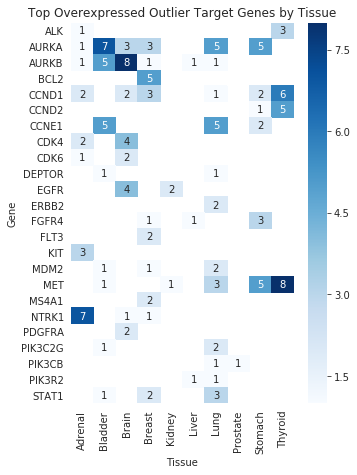

In [485]:
plt.figure(figsize=(5, 7))
sns.heatmap(top_outliers, cmap='Blues', annot=True)
plt.xlabel('Tissue')
plt.title('Top Overexpressed Outlier Target Genes by Tissue')

## Normal

In [486]:
outliers = pvals[(pvals.Pval < 0.05) & (pvals.dataset == 'normal')]
g = outliers.groupby(['Gene', 'tissue'])
count = g.count().reset_index()
array = count.pivot_table(values='Pval', index='Gene', columns='tissue')
array = array.loc[sorted(drug_genes)]
top_outliers = array[array.sum(axis=1) > 1]

Text(0.5, 1.0, 'Top Overexpressed Outlier Target Genes by Tissue')

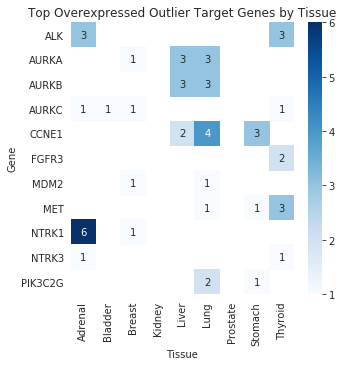

In [490]:
plt.figure(figsize=(5, 5))
sns.heatmap(top_outliers, cmap='Blues', annot=True)
plt.xlabel('Tissue')
plt.title('Top Overexpressed Outlier Target Genes by Tissue')

## Tumor

In [496]:
outliers = pvals[(pvals.Pval < 0.05) & (pvals.dataset == 'tumor')]
g = outliers.groupby(['Gene', 'tissue'])
count = g.count().reset_index()
array = count.pivot_table(values='Pval', index='Gene', columns='tissue')
array = array.loc[sorted(drug_genes)]
top_outliers = array[array.sum(axis=1) >= 1]

Text(0.5, 1.0, 'Top Overexpressed Outlier Target Genes by Tissue')

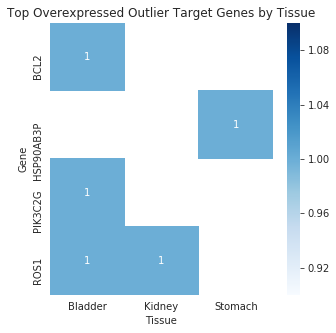

In [497]:
plt.figure(figsize=(5, 5))
sns.heatmap(top_outliers, cmap='Blues', annot=True)
plt.xlabel('Tissue')
plt.title('Top Overexpressed Outlier Target Genes by Tissue')

## Compare to IQR Method

In [175]:
weights

,tissue,match-weight
TCGA-PR-A5PH-01,Adrenal,0.104814
TCGA-QT-A5XN-01,Adrenal,0.061936
TCGA-OU-A5PI-01,Adrenal,0.885370
TCGA-W2-A7HE-01,Adrenal,0.801650
TCGA-QR-A70C-01,Adrenal,0.021088
TCGA-QR-A7IN-01,Adrenal,0.088359
TCGA-QR-A6ZZ-01,Adrenal,0.026271
TCGA-QR-A70K-01,Adrenal,0.038135
TCGA-PK-A5HA-01,Adrenal,0.537197
TCGA-K4-A5RH-01,Bladder,0.382192


In [171]:
outliers[outliers.tissue == 'Liver']

,Gene,Pval,tissue
0,AQP8,0.00142,Liver
0,PIK3R2,0.04194,Liver
0,AURKB,0.01881,Liver
1,GLI1,0.02064,Liver
2,FGFR4,0.02672,Liver
3,APOA2,0.02682,Liver
4,FGFR3,0.03056,Liver
0,AQP8,0.00902,Liver


# P-value Distributions

In [498]:
gtex_out = '/mnt/outlier-runs/gtex-tumor-100/gtex'
normal_out = '/mnt/outlier-runs/gtex-tumor-100/normal'
tumor_out = '/mnt/outlier-runs/gtex-tumor-100/tumor'
paths = [gtex_out, normal_out, tumor_out]
labels = ['gtex', 'normal', 'tumor']

pvals = []
samples = []
for sample in tqdm(os.listdir(gtex_out)):
    samples.append(sample)
    for label, path in zip(labels, paths):
        try:
            p = pd.read_csv(os.path.join(path, sample, 'pvals.tsv'), sep='\t', index_col=0)
            p['dataset'] = label
            pvals.append(p)
        except:
            pass

pvals = pd.concat(pvals)
pvals.head(2)

,Pval,dataset
Gene,,
CCND1,0.00709,gtex
PIK3C3,0.02176,gtex


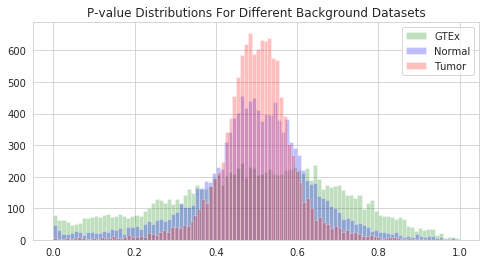

In [504]:
plt.figure(figsize=(8, 4))
plt.hist(pvals[pvals.dataset == 'gtex'].Pval, alpha=0.25, bins=100, label='GTEx', color='g')
plt.hist(pvals[pvals.dataset == 'normal'].Pval, alpha=0.25, bins=100, label='Normal', color='b')
plt.hist(pvals[pvals.dataset == 'tumor'].Pval, alpha=0.25, bins=100, label='Tumor', color='r')
#plt.axvline(0.05, c='r')
#plt.axvline(0.95, c='r', label='Significance Cutoff')
plt.legend()
plt.title('P-value Distributions For Different Background Datasets');